# Разработка модели


## Цель

<p>Разработка модели прогнозирования<p/>

<p>В этой работе мы разработаем несколько моделей, которые будут прогнозировать цену автомобиля с использованием переменных или функций. Это всего лишь оценка, но она должна дать нам объективное представление о том, сколько должен стоить автомобиль.</p>

Некоторые вопросы, которые мы хотим расскрыть в этой работе

<ul>
    <li>Знаю ли я, предлагает ли дилер справедливую стоимость моей сделки?</li>
    <li>Знаю ли я, оцениваю ли я свою машину по справедливой стоимости?</li>
</ul>
<p>В анализе данных мы часто используем <b> Разработку моделей</b> чтобы помочь нам предсказать будущие наблюдения на основе имеющихся у нас данных.</p>

<p>Модель поможет нам понять точную взаимосвязь между различными переменными и то, как эти переменные используются для прогнозирования результата.</p>

<h4>Начинаем с установки основных библиотек Пайтон</h4>

Импортируем библиотеки:

In [1]:
import pandas as pd # Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временными рядами.
import numpy as np # библиотека с открытым исходным кодом для языка программирования Python. Возможности: поддержка многомерных массивов (включая матрицы); поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами. 
import matplotlib.pyplot as plt

Загружаем данные и сохраняем их в фрейме данных df:

In [2]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Линейная регрессия и Множественная линейная регрессия</h2>

<h4>Линейная регрессия (англ. Linear Regression)</h4>

<p>Одним из примеров модели данных, которую мы будем использовать, является:</p>
<b>Простая линейная регрессия (англ.Simple Linear Regression)</b>

<br>
<p>Простая линейная регрессия - это метод, который помогает нам понять взаимосвязь между двумя переменными:</p>
<ul>
    <li>Предиктор/независимая переменная (X)</li>
    <li>Целевая/зависимая переменная (которую мы хотим предсказать)(Y)</li>
</ul>

<p>Результатом линейной регрессии является <b>линейная функция</b> - это предсказывает целевую переменную (зависимую) как функцию переменной предиктора (независимой):</p>


$$
Y: Response \ Variable - (Целевая \ Переменная)\\\\
X: Predictor \ Variables - (Предиктор \ Переменная) \\\\
$$

<b>Линейная функция:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a относится к <b> перехвату </b> линии регрессии, другими словами: значение Y, когда X равно 0</li>
    <li>b относится к <b> наклону </b> линии регрессии, другими словами: значение, с которым изменяется Y, когда X увеличивается на 1 единицу</li>
</ul>


<h4>Давайте загрузим модули для линейной регрессии:</h4>

In [3]:
from sklearn.linear_model import LinearRegression

<h4>Создайте объект линейной регрессии:</h4>

In [4]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Как "highway-mpg" (пройденный путь) может помочь нам спрогнозировать цену автомобиля?</h4>

В этом примере мы хотим посмотреть, как highway-mpg (проиденный путь) может помочь нам спрогнозировать цену автомобиля. Используя простую линейную регрессию, мы создадим линейную функцию с "шоссе-mpg" в качестве переменной-предиктора и "ценой" в качестве переменной отклика.

In [5]:
X = df[['highway-mpg']]
Y = df['price']

Подгонка линейной модели с использованием highway-mpg:

In [6]:
lm.fit(X,Y)

LinearRegression()

Мы можем вывести прогноз:

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Какова ценность перехвата(a)?</h4>

In [8]:
lm.intercept_

38423.305858157386

<h4>Какова величина уклона (b)?</h4>

In [9]:
lm.coef_

array([-821.73337832])

<h3>Какова окончательная оценочная линейная модель, которую мы получаем?</h3>

Как мы видели выше, мы должны получить окончательную линейную модель со структурой:

$$
Yhat = a + b  X
$$

Подключая фактические значения, мы получаем:

<b>Цена</b> = 38423.31 - 821.73 x <b>highway-mpg (пройденный путь)</b>

<div class= "тревога тревога-опасность, предупреждающая об опасности" style="margin-top: 20px">
<h1>Вопрос#1 a): </h1>

<b>Создайте объект линейной регрессии под названием "lm1".</b>

</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Создайте объект линейной регрессии под названием "lm1".</b>

</div>

In [10]:
lm1 = LinearRegression()
lm1

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Обучите модель, используя "размер двигателя" в качестве независимой переменной и "цену" в качестве зависимой переменной?</b>

</div>

In [11]:
lm1.fit(df[['engine-size']], df[['price']]) # метод fit дословно переводится как подгонка
lm1

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Найдите наклон и перехват модели.</b>

</div>

<h4>Slope (наклон):</h4>

In [12]:
Yhat=lm1.predict(df[['engine-size']])
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [13]:
lm1.coef_

array([[166.86001569]])

<h4>перехват</h4>

In [14]:
# Напишите свой код ниже и нажмите Shift+Enter, чтобы выполнить
lm1.intercept_

array([-7963.33890628])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>Каково уравнение предсказанной линии? Вы можете использовать x и yhat или "размер двигателя" или "цена".</b>

</div>


### using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*engine-size

```

</details>

In [15]:
-7963.34 + 166.86*X

,highway-mpg
0,-3458.12
1,-3458.12
2,-3624.98
3,-2957.54
4,-4292.42
...,...
196,-3291.26
197,-3791.84
198,-4125.56
199,-3458.12


<h4>Множественная Линейная регрессия (с англ.Multiple Linear Regression)</h4>

<p>Что делать, если мы хотим спрогнозировать цену автомобиля, используя более одной переменной?</p>

<p>Если мы хотим использовать больше переменных в нашей модели для прогнозирования цены автомобиля, мы можем использовать <b> Множественную линейную регрессию </b>.
Множественная линейная регрессия очень похожа на простую линейную регрессию, но этот метод используется для объяснения взаимосвязи между одной непрерывной (зависимой) переменной ответа и <b> двумя или более </b> предикторными (независимыми) переменными.
Большинство регрессионных моделей реального мира включают в себя несколько предикторов. Мы проиллюстрируем структуру с помощью четырех переменных-предикторов, но эти результаты можно обобщить на любое целое число:</p>

$$
Y: Response \ Variable\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


Уравнение задается формулой:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>Из предыдущего раздела мы знаем, что другими хорошими предикторами цены могут быть:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Давайте разработаем модель, используя эти переменные в качестве переменных-предикторов.


In [16]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Установите линейную модель с использованием четырех вышеупомянутых переменных.

In [17]:
lm.fit(Z, df['price'])

LinearRegression()

Какова ценность перехвата (а)?

In [18]:
lm.intercept_

-15806.624626329198

Каковы значения коэффициентов (b1, b2, b3, b4)?

In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Какова окончательная оценочная линейная модель, которую мы получаем?

Как мы видели выше, мы должны получить конечную линейную функцию со структурой:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

Какова линейная функция, которую мы получаем в этом примере?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
Создайте и обучите модель множественной линейной регрессии "lm2", где переменной отклика является "цена", а переменной-предиктором являются "нормализованные потери" и "шоссе-mpg".
</div>

In [20]:
V = df[['normalized-losses', 'highway-mpg']]

In [21]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [22]:
lm2.fit(V, df['price'])

LinearRegression()

In [23]:
# либо так lm2 = LinearRegression()
# и продолжение lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Найдите коэффициент модели</b>
</div>

In [24]:
lm2.coef_

array([   1.49789586, -820.45434016])

<h2>2. Оценка модели с использованием визуализации</h2>

Теперь, когда мы разработали несколько моделей, как нам оценить наши модели и выбрать лучшую? Один из способов сделать это - использовать визуализацию.

Импортируем пакет визуализации, сиборн:

In [25]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>График регрессии</h3>

<p>Когда дело доходит до простой линейной регрессии, отличным способом визуализировать соответствие нашей модели является использование <b> графиков регрессии</b>.</p>

<p>На этом графике будет показана комбинация разбросанных точек данных (<b> диаграмма рассеяния </b>), а также подогнанная <b> линия линейной регрессии </b>, проходящая через данные. Это даст нам разумную оценку взаимосвязи между двумя переменными, силы корреляции, а также направления (положительной или отрицательной корреляции).</p>

Давайте представим **highway-mpg** в качестве потенциальной переменной-предиктора цены:

(0.0, 48179.00156432332)

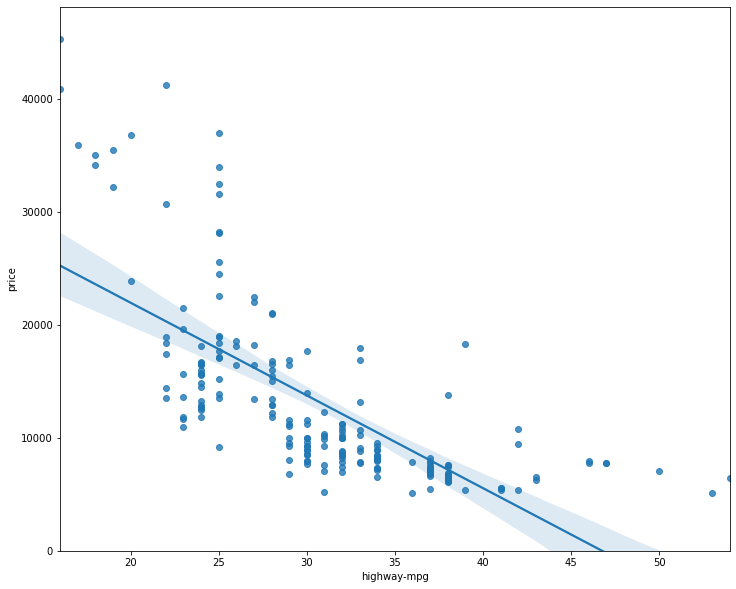

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>Из этого графика мы видим, что цена отрицательно коррелирует с шоссе-mpg, так как наклон регрессии отрицательный.

Одна вещь, которую следует иметь в виду при просмотре графика регрессии, - это обратить внимание на то, насколько разбросаны точки данных вокруг линии регрессии. Это даст вам хорошее представление о дисперсии данных и о том, будет ли линейная модель наиболее подходящей или нет. Если данные находятся слишком далеко от линии, эта линейная модель может оказаться не лучшей моделью для этих данных.

Давайте сравним этот график с графиком регрессии "peak-rpm".</p>

(0.0, 47414.1)

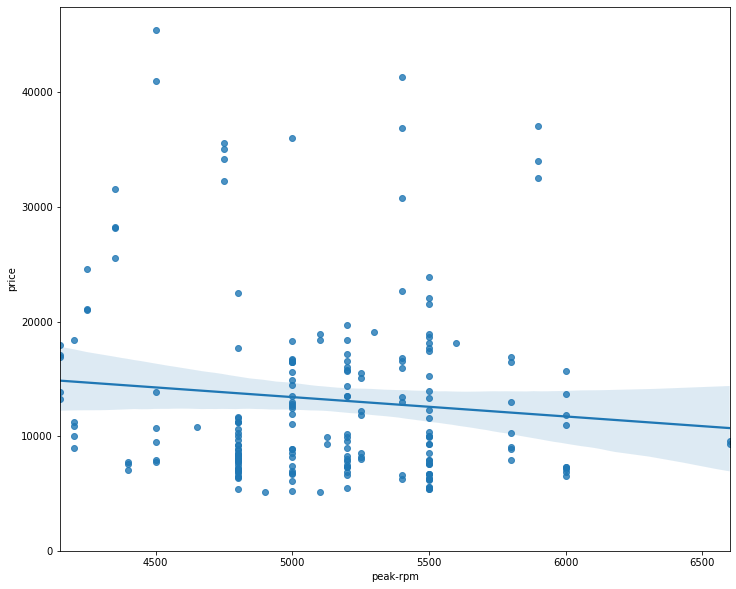

In [27]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Сравнивая график регрессии "пик-оборотов в минуту" и "шоссе-миль на галлон", мы видим, что точки для "шоссе-миль на галлон" намного ближе к сгенерированной линии и в среднем уменьшаются. Точки для "пиковых оборотов" имеют больший разброс по прогнозируемой линии, и гораздо сложнее определить, уменьшаются или увеличиваются точки по мере увеличения "пиковых оборотов".</p>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Учитывая приведенные выше графики регрессии, "пиковые обороты" или "скорость на шоссе" сильнее коррелируют с "ценой"? Используйте этот метод  ".corr()" to verify your answer.</b>
</div>

In [28]:
# Переменная "highway-mpg" имеет более сильную корреляцию с "ценой", она составляет приблизительно -0,704692 по сравнению с "пиковой скоростью вращения", которая составляет приблизительно -0,101616. Вы можете проверить это с помощью следующей команды:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Остаточный Участок</h3>

<p>Хороший способ визуализировать дисперсию данных - использовать остаточный график.</p>

<p>Что такое <b>остаточный</b>?</p>

<p>Разница между наблюдаемым значением (y) и прогнозируемым значением (Yhat) называется остаточным (e). Когда мы смотрим на график регрессии, остаток - это расстояние от точки данных до установленной линии регрессии.</p>

<p>Так что же такое <b> остаточный участок</b>?</p>

<p>График остатков - это график, который показывает остатки по вертикальной оси y и независимую переменную по горизонтальной оси x</p>

<p>На что мы обращаем внимание, когда смотрим на остаточный участок?</p>

<p>Мы смотрим на распределение остатков:</p>

<p>- Если точки на остаточном графике <b> случайным образом распределены вокруг оси x </b>, то подходит <b> линейная модель</b> для получения данных.

Почему это так? Случайно распределенные остатки означают, что дисперсия постоянна, и поэтому линейная модель хорошо подходит для этих данных.</p>


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


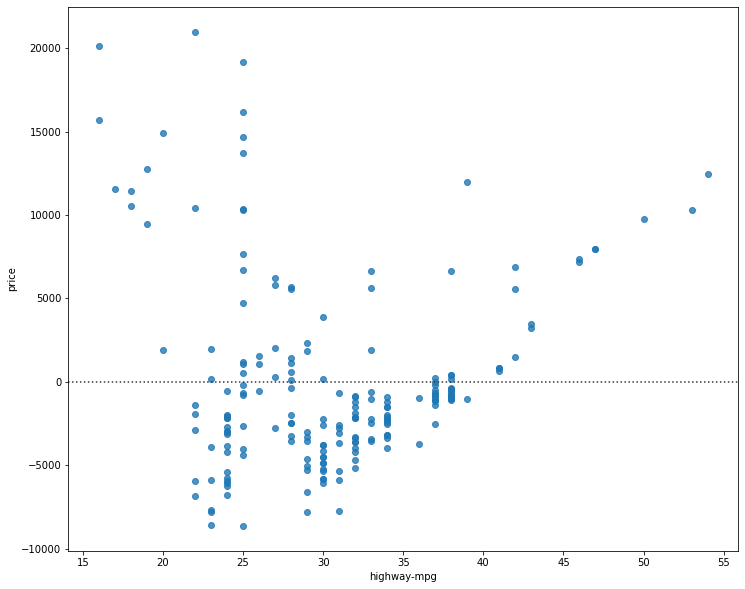

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<i>О чем говорит нам этот сюжет?</i>

<p>Из этого графика остатков видно, что остатки не распределены случайным образом по оси x, что наводит нас на мысль, что, возможно, нелинейная модель более подходит для этих данных.</p>

<h3>Множественная линейная регрессия (англ. Multiple Linear Regression)</h3>

<p>Как мы визуализируем модель множественной линейной регрессии? Это становится немного сложнее, потому что вы не можете визуализировать это с помощью регрессии или остаточного графика.</p>

<p>Один из способов оценить соответствие модели - посмотреть на график распределения <b> </b>. Мы можем посмотреть на распределение подогнанных значений, полученных в результате модели, и сравнить его с распределением фактических значений.</p>

Во-первых, давайте сделаем прогноз:

In [30]:
Y_hat = lm.predict(Z)

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


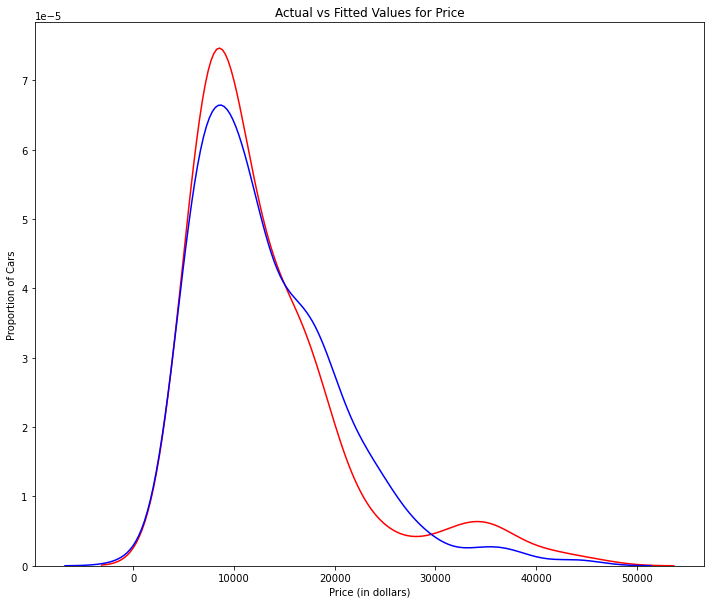

In [31]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>Мы видим, что установленные значения достаточно близки к фактическим значениям, поскольку два распределения немного перекрываются. Тем не менее, определенно есть некоторые возможности для улучшения.</p>

<h2>3. Полиномиальная регрессия и конвейеры (англ.Polynomial Regression and Pipelines)</h2>

<p><b>Полиномиальная регрессия </b> является частным случаем общей модели линейной регрессии или моделей множественной линейной регрессии.</p> 
<p>Мы получаем нелинейные зависимости, возводя в квадрат или устанавливая члены более высокого порядка переменных - предикторов.</p>

<p>Существуют различные порядки полиномиальной регрессии:</p>

<center><b>Квадратичный - 2-й порядок</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Кубический - 3-й порядок</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>высший порядок</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>Ранее мы видели, что линейная модель не обеспечивает наилучшего соответствия при использовании "шоссе-mpg" в качестве переменной-предиктора. Давайте посмотрим, можем ли мы вместо этого попробовать подогнать полиномиальную модель к данным.</p>

<p>Мы будем использовать следующую функцию для отображения данных:</p>

In [32]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Давайте получим переменные:

In [33]:
x = df['highway-mpg']
y = df['price']

Давайте поместим многочлен с помощью функции polyfit, затем используем функцию poly1d для отображения полиномиальной функции.

In [35]:
# Здесь мы используем многочлен 3-го порядка (кубический)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Давайте построим график функции:

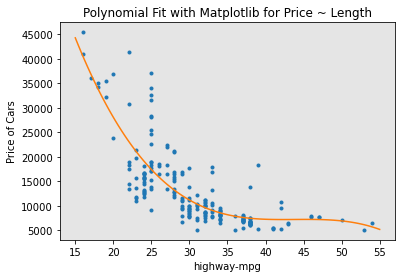

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>Мы уже можем видеть из графика, что эта полиномиальная модель работает лучше, чем линейная модель. Это происходит потому, что сгенерированная полиномиальная функция "попадает" в большее количество точек данных.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Создайте полиномиальную модель 11 порядка с переменными x и y сверху.</b>
</div>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


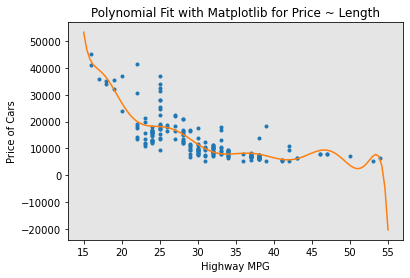

In [40]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

<p>аналитическое выражение для многомерной полиномиальной функции усложняется. Например, выражение для полинома второго порядка (степень=2) с двумя переменными задается:</p>

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$

Мы можем выполнить полиномиальное преобразование для нескольких объектов. Сначала мы импортируем модуль:

In [41]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2:

In [42]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [43]:
Z_pr=pr.fit_transform(Z)

В исходных данных содержится 201 образец и 4 функции.

In [45]:
Z.shape

(201, 4)

После преобразования имеется 201 образец и 15 функций.

In [46]:
Z_pr.shape

(201, 15)

<h2>Конвейер</h2>

<p>Конвейеры данных упрощают этапы обработки данных. Мы используем модуль <b>Конвейер </b> для создания конвейера. Мы также используем <b>StandardScaler</b> в качестве шага в нашем конвейере.</p>


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Мы создаем конвейер, создавая список кортежей, включающий имя модели или оценщика и соответствующий ему конструктор.

In [48]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Мы вводим список в качестве аргумента конструктору конвейера:

In [49]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Во-первых, мы преобразуем тип данных Z в тип float, чтобы избежать предупреждений о преобразовании, которые могут появиться в результате того, что StandardScaler принимает входные данные с плавающей точкой.

Затем мы можем нормализовать данные, выполнить преобразование и одновременно подогнать модель.

In [50]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Аналогично, мы можем нормализовать данные, выполнить преобразование и произвести прогноз одновременно.

In [51]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Создайте конвейер, который стандартизирует данные, затем создайте прогноз с использованием модели линейной регрессии с использованием функций Z and target y.</b>
</div>

In [52]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>4. Меры для оценки в выборке</h2>

<p>При оценке наших моделей мы не только хотим визуализировать результаты, но и хотим получить количественную оценку, чтобы определить, насколько точна модель.</p>

<p>Двумя очень важными показателями, которые часто используются в статистике для определения точности модели, являются:</p>
<ul>
    <li><b>R^2/ R-квадрат</b></li>
    <li><b>Среднеквадратичная Ошибка (MSE)</b></li>
</ul>

<b>R-квадрат</b>

<p>R в квадрате, также известный как коэффициент детерминации, является мерой, указывающей, насколько данные близки к установленной линии регрессии.</p>

<p>Значение R-квадрата - это процент изменения переменной отклика (y), который объясняется линейной моделью.</p>

<b>Среднеквадратичная Ошибка (MSE)</b>

<p>Среднеквадратичная ошибка измеряет среднее значение квадратов ошибок. То есть разница между фактическим значением (y) и оценочным значением (ŷ).</p>

<h3>Model 1: Простая Линейная регрессия</h3>

Давайте вычислим R^2:

In [54]:
#highway_mpg_fit
lm.fit(X, Y)
# Найти R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


Мы можем сказать, что \~49,659% вариации цены объясняется этой простой линейной моделью "лошадиная сила".

Давайте вычислим MSE:

Мы можем предсказать результат, т. Е. "yhat", используя метод прогнозирования, где X - входная переменная:

In [55]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Давайте импортируем функцию <b>mean_squared_error</b> из модуля <b>metrics</b>:

In [56]:
from sklearn.metrics import mean_squared_error

Мы можем сравнить прогнозируемые результаты с фактическими результатами:

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Model 2: Множественная Линейная регрессия</h3>

Давайте вычислим R^2:

In [58]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Мы можем сказать, что \~80,896 % изменения цены объясняется этой множественной линейной регрессией.

Давайте вычислим MSE.

Мы производим прогнозирование:

In [60]:
Y_predict_multifit = lm.predict(Z)

Мы сравниваем прогнозируемые результаты с фактическими результатами:

In [61]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Полиномиальная подгонка</h3>

Давайте вычислим R^2.

Давайте импортируем функцию <b>r2\_score </b> из модуля <b>metrics</b> поскольку мы используем другую функцию.

In [62]:
from sklearn.metrics import r2_score

Мы применяем функцию, чтобы получить значение R^2:

In [63]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


Мы можем сказать, что \~67,419 % вариации цены объясняется этим полиномиальным соответствием.

<h3>MSE</h3>

Мы также можем рассчитать the MSE:

In [ ]:
mean_squared_error(df['price'], p(x))

<h2>5.Прогнозирование и принятие решений</h2>
<h3>предсказание</h3>

<p>В предыдущем разделе мы обучили модель с помощью метода <b>fit</b>. Теперь мы будем использовать метод <b>прогнозировать </b> для получения прогноза. Позволяет импортировать <b>pyplot</b> для построения графика; мы также будем использовать некоторые функции из numpy.</p>

In [64]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Создайте новый ввод input:

In [65]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit (создание) the model (модели):

In [66]:
lm.fit(X, Y)
lm

LinearRegression()

Создайте прогноз:

In [67]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Мы можем построить график данных:

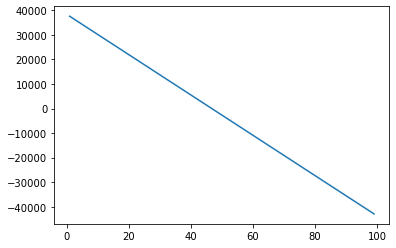

In [68]:
plt.plot(new_input, yhat)
plt.show()

<h3>Принятие решений: Определение подходящей модели</h3>

<p>Теперь, когда мы визуализировали различные модели и сгенерировали значения R-квадрата и MSE для подгонки, как мы определяем хорошую подгонку модели?
<ul>
    <li><i>Что такое хорошее значение R-квадрата?</i></li>
</ul>
</p>

<p>При сравнении моделей <b> модель с более высоким значением R-квадрата лучше подходит </b> для данных.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>При сравнении моделей <b> модель с наименьшим значением MSE лучше подходит </b> для данных.</p>

<h4>Давайте взглянем на значения для разных моделей.</h4>
<p>Простая линейная регрессия: Использование Highway-mpg в качестве переменной-предиктора цены.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Множественная линейная регрессия: Использование лошадиных сил, снаряженной массы, размера двигателя и скорости движения по шоссе в качестве переменных-предикторов цены.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Полиномиальное соответствие: Использование Highway-mpg в качестве переменной-предиктора цены.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Модель простой линейной регрессии (SLR) против модели множественной линейной регрессии (MLR)</h3>

<p>Обычно, чем больше у вас переменных, тем лучше ваша модель предсказывает, но это не всегда верно. Иногда у вас может быть недостаточно данных, вы можете столкнуться с числовыми проблемами, или многие переменные могут быть бесполезны и даже действовать как шум. В результате вы всегда должны проверять MSE и R^2.</p>

<p>Чтобы сравнить результаты моделей MLR и SLR, мы рассмотрим комбинацию как R-квадрата, так и MSE, чтобы сделать наилучший вывод о соответствии модели.
<ul>
    <li><b>MSE</b>: MSE зеркальной камеры составляет 3,16x10^7, в то время как MLR имеет MSE 1,2 x10^7. MSE MLR намного меньше.</li>
    <li><b>R-squared</b>: В этом случае мы также можем видеть, что существует большая разница между R-квадратом SLR и R-квадратом MLR. R-квадрат для SLR (~0,497) очень мал по сравнению с R-квадратом для MLR (~0,809).</li>
</ul>
</p>

Этот R-квадрат в сочетании с MSE показывает, что MLR кажется более подходящей моделью в этом случае по сравнению с SLR.

<h3>Простая линейная модель (SLR) против полиномиальной подгонки</h3>

<ul>
    <li><b>MSE</b>: Мы можем видеть, что полиномиальное соответствие снизило MSE, так как этот MSE меньше, чем у зеркального.</li> R-квадрат для полиномиальной подгонки больше, чем R-квадрат для зеркальной камеры, поэтому Полиномиальная подгонка также немного увеличила R-квадрат. </li>
</ul>
<p>Поскольку полиномиальное соответствие привело к более низкому MSE и более высокому R-квадрату, мы можем сделать вывод, что эта модель была более подходящей, чем простая линейная регрессия для прогнозирования "цены" с "шоссе-mpg" в качестве переменной-предиктора.</p>

<h3>Множественная линейная регрессия (MLR) по сравнению с полиномиальной подгонкой</h3>

<ul>
    <li><b>MSE</b>: MSE для MLR меньше, чем MSE для полиномиальной подгонки.</li>
    <li><b>R-squared</b>: R-квадрат для MLR также намного больше, чем для полиномиальной подгонки.</li>
</ul>


<h2>заключение (англ. conclusion)</h2>

<p>Сравнивая эти три модели, мы приходим к выводу, что <b> модель MLR является лучшей моделью </b>, позволяющей прогнозировать цену на основе нашего набора данных. Этот результат имеет смысл, поскольку у нас всего 27 переменных, и мы знаем, что более одной из этих переменных являются потенциальными предикторами конечной цены автомобиля.</p>